## Incremental Learning based Face Recognition System

### Subject: Intelligent Consumer Technology

### Name of group members:
Subhrajyoti Sen Gupta: 898072; s.sengupta1@campus.unimib.it

Shivani Bayas: 903430 ; s.bayas@campus.unimib.it

### Course professors:
Paolo Napoletano: paolo.napoletano@unimib.it

Luigi Celona: luigi.celona@unimib.it

###INSTALLING AND IMPORTING

In the first part we are going to consider some of the essential consideration like installing packages and importing libraries that are required before starting with the algorithms.

**1.** Mounting the drive so that we can access the drive beforehand and data can be fetched.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2.** Here we are installing the packages that are required to be used used to install Python packages from the Python Package Index (PyPI)

In [ ]:
!pip install mtcnn
!pip install openface
!pip install deepface

**3.** Importing libraries required

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import random
from PIL import Image
import seaborn as sns
from torchvision import transforms
import dlib
import cv2
from google.colab.patches import cv2_imshow
from mtcnn import MTCNN
import openface
from deepface import DeepFace
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

### IMPORTING THE DATA

In the upcoming phase of our project, we'll define the file paths and read the images along with their corresponding labels, which represent the characters depicted in each image.

This process will culminate in the creation of a structured dataframe. Let's ensure smooth execution as we progress towards handling the data with precision and professionalism.

**1.** Defining the path for the image.

In [ ]:
path_zip = '/content/drive/MyDrive/Colab Notebooks/ICT project/selected_ids'

**2.** In the subsequent step, we'll embark on opening the images by reading their file paths from the designated directory. We'll meticulously organize this data into a tabular format, structured as a dataframe. This dataframe will boast columns representing the file paths for each image, meticulously paired with their corresponding labels. This meticulous organization ensures clarity and ease of further analysis, facilitating our journey towards comprehensive data understanding.

In [ ]:
filepath=[]
label=[]

for person in [path_zip]:
  ids=os.listdir(person)

  #26 components
  for inperson in ids:

    human=os.path.join(person,inperson)
    img_list=os.listdir(human)
    for i, img in enumerate(img_list):
      img_path=os.path.join(human, img)
      filepath.append(img_path)
      label.append(inperson)

img_df=pd.Series(filepath,name='filepaths')
label_df=pd.Series(label, name='labels')

data_df=pd.concat([img_df, label_df], axis=1)
data_df


,filepaths,labels
0,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004936
1,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004936
2,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004936
3,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004936
4,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004936
...,...,...
12845,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004576
12846,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004576
12847,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004576
12848,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n004576


### DATA INSIGHTS AND VISUALISATION:

In this section, we're delving deep into our data, examining it closely to identify any discernible patterns and insights.

Through visualization techniques, we'll create clear representations of our data, making it easier to extract valuable information from our dataset, guiding our decision-making process moving forward.

**1.** Counting the number of images each character have by means of sorting them as label based on descending order.

In [ ]:
count=data_df['labels'].value_counts()
print(count.shape[0])
print(count)

26
labels
n004936    680
n008388    661
n000956    590
n001006    590
n003995    572
n002447    551
n006683    537
n007630    524
n007999    505
n008476    503
n002438    496
n002178    493
n004485    483
n002779    481
n008936    474
n004576    469
n005745    467
n002316    447
n001461    436
n006322    420
n003623    419
n007530    416
n006118    412
n002336    411
n005983    411
n007604    402
Name: count, dtype: int64


**2.** For creating visualisation as a plot we are creating bar plot to analyse them

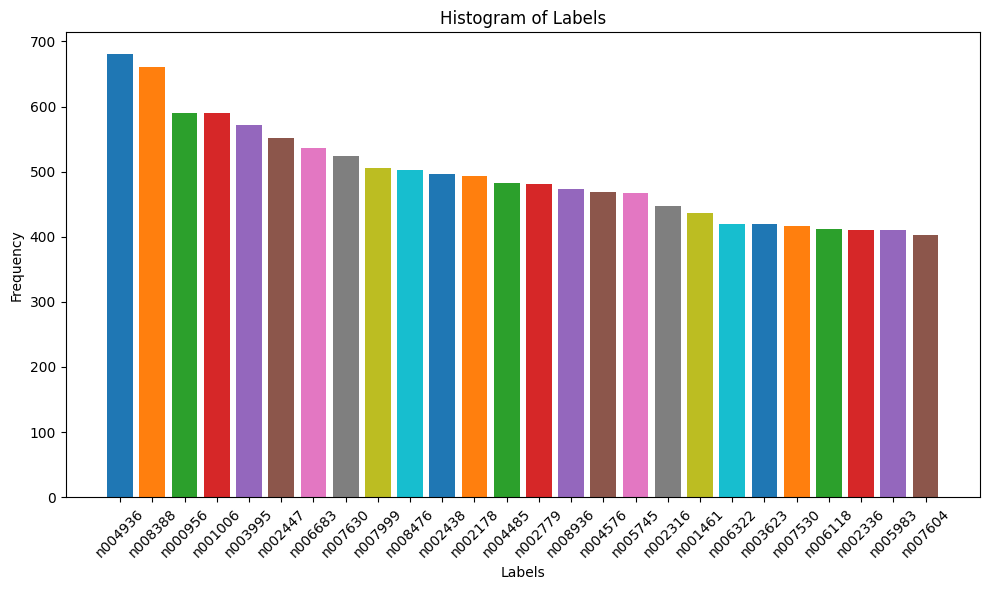

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(count.shape[0]):
  #we are plotting a histogram
  plt.bar(i, count[i])
  plt.xlabel('Labels')
  plt.ylabel('Frequency')
  plt.title('Histogram of Labels')
plt.xticks(range(len(count.index)), count.index, rotation=45)
plt.tight_layout()
plt.show()


**3.** Now as we can visualise that the data is having imbalance we can trim the data to make it equalise over the whole dataset thus making it more helpful to process.

Here we are cutting the number of images to 60 images per character and there are 26 characters, as this can help us to extract features more easily and it will take less time.

In [ ]:
def trim(max_size):
  print("number of labels=", len(data_df['labels'].unique()))
  groupping=data_df.groupby('labels').apply(lambda x:x.sample(max_size,replace=True))
  trimmed_df=groupping.reset_index(drop=True)
  print(list(trimmed_df['labels'].value_counts()))
  return trimmed_df

trimmed_data_df=trim(60)
trimmed_data_df

number of labels= 26
[60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]


,filepaths,labels
0,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n000956
1,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n000956
2,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n000956
3,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n000956
4,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n000956
...,...,...
1555,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n008936
1556,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n008936
1557,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n008936
1558,/content/drive/MyDrive/Colab Notebooks/ICT pro...,n008936


**4.** Counting the number of images in each categories and as we can see all of the characters are having 60 images.

In [ ]:
count=trimmed_data_df['labels'].value_counts()
print(count.shape[0])
print(count)

26
labels
n000956    60
n001006    60
n008476    60
n008388    60
n007999    60
n007630    60
n007604    60
n007530    60
n006683    60
n006322    60
n006118    60
n005983    60
n005745    60
n004936    60
n004576    60
n004485    60
n003995    60
n003623    60
n002779    60
n002447    60
n002438    60
n002336    60
n002316    60
n002178    60
n001461    60
n008936    60
Name: count, dtype: int64


**5.** Visualising the distribution after the balancing process

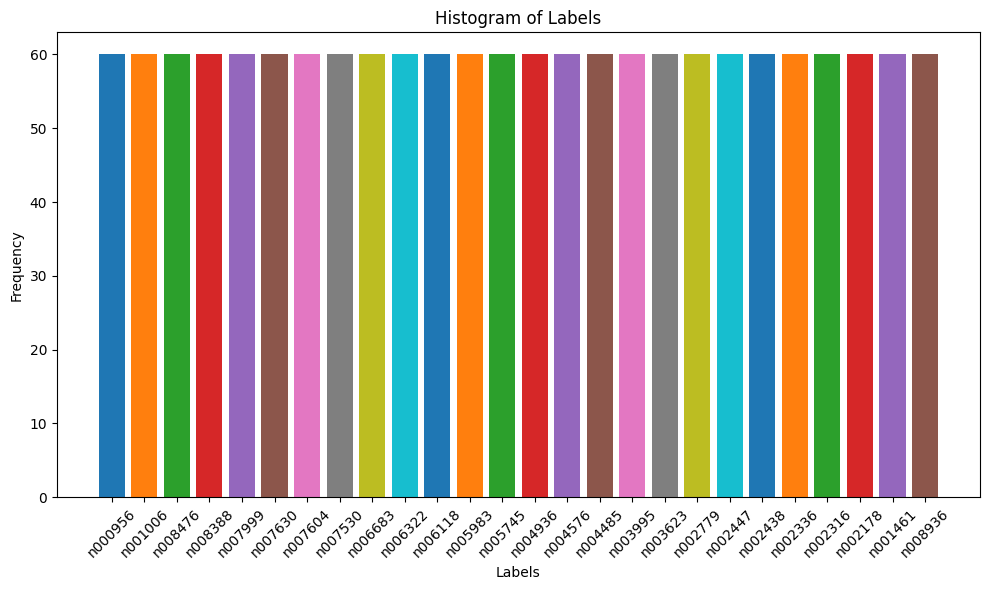

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(count.shape[0]):
  #we are plotting a histogram
  plt.bar(i, count[i])
  plt.xlabel('Labels')
  plt.ylabel('Frequency')
  plt.title('Histogram of Labels')
plt.xticks(range(len(count.index)), count.index, rotation=45)
plt.tight_layout()
plt.show()


**6.** After visualising the balanced data now it is time to check the image and the content it holds.

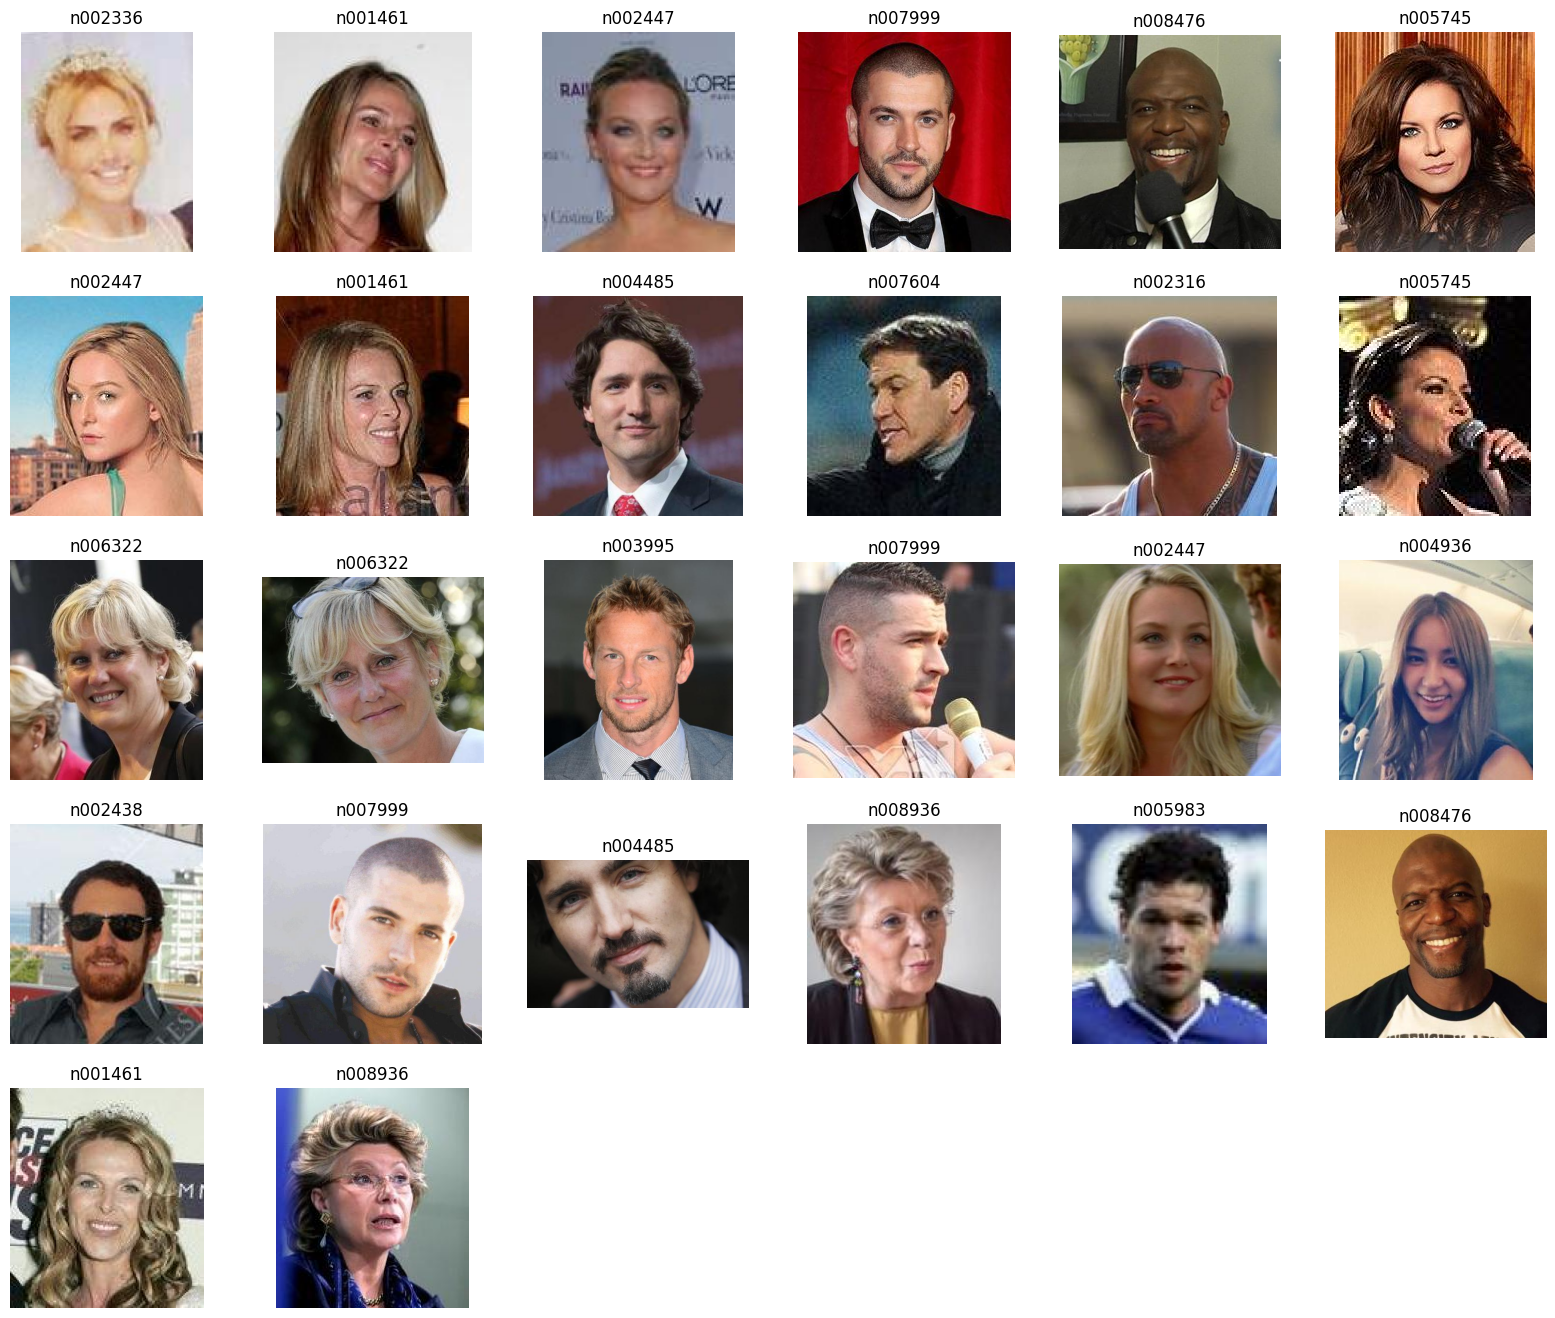

In [ ]:
def image_show(gen):
    plt.figure(figsize=(20, 20))
    if len(gen) > 26:
        r = 26
    else:
        r = len(gen)
    random_sample = random.sample(range(len(gen)), r)
    for i, idx in enumerate(random_sample):
        image_path = gen.iloc[idx, 0]
        label = gen.iloc[idx, 1]
        image = Image.open(image_path)
        plt.subplot(6, 6, i + 1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')  # Turn off axis for cleaner visualization

    plt.show()

image_show(trimmed_data_df)

### FOR FEATURE EXTRACTION, WE'LL BE CONDUCTING LANDMARK AND FACE DETECTION:

In image recognition/ face recognition system the most important aspect to consider is the detection of the face for which we are going to use `MTCNN()` which is acting as a face detector and the purspose is to use this to detect the faces in the image.

Once the face is detected we can draw bounding box and using `dlib.shape_predictor` we can infuse the 68 landmark points over the face that is being detected.

Now to form the feature vector we are going to loop over every single images and using the `Facenet512` pretrained model we are going to extract features in form of vector for each image.


**1.** First of all we are defining a function called "landmark" that is going to detect the 68 points of landmark over the face.

In [ ]:
def landmark(landmarks, image_rgb):
  # Draw landmark points on the face
  for i in range(68):
    x_landmark = landmarks.part(i).x
    y_landmark = landmarks.part(i).y
    marks=cv2.circle(image_rgb, (x_landmark, y_landmark), 1, (0, 0, 255), -1)
  return marks


**2.** We define a function called "extract_features" which works as a feature vector creator of each image that means it is going to extract features from each image and then store it as a CSV file. For each image we have feature vector CSV files along with labels.

In [ ]:
def extract_features(img, filelabel,count):
    features=[]

    result=DeepFace.represent(img, model_name='Facenet512',enforce_detection=False)
    features.append(result[0]["embedding"])
    features_df = pd.DataFrame(features)

    path_save='/content/drive/MyDrive/Colab Notebooks/ICT project/image_feature/'+ filelabel + '_' + str(count+1) + '.csv'
    features_df.to_csv(path_save,index=False)
    return features_df

In [ ]:
'''
###################Load face detector and shape predictor#######################
detector = MTCNN()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/ICT project/shape_predictor_68_face_landmarks.dat")  # Path to shape predictor


# Define target size for resized images
target_size = (100,100)

##################Iterate through each image in the dataframe###################
for index, row in trimmed_data_df.iterrows():
    # Read image
    image = cv2.imread(row['filepaths'])
    name= row['labels']

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces in the RGB image
    faces = detector.detect_faces(image_rgb)

    # Initialize variables to store information about the largest face
    largest_face_size = 0
    largest_face_bbox = None
    largest_face_landmarks = None

    # Process each detected face
    for face in faces:
        x, y, w, h = face['box']

        # Calculate face size
        face_size = w * h

        # Check if the current face is the largest so far
        if (face_size > largest_face_size) or len(face)<=1:
            largest_face_size = face_size
            largest_face_bbox = (x, y, w, h)

    # Check if a face is detected
    if largest_face_bbox is not None:
        x, y, w, h = largest_face_bbox

        # Create a dlib rectangle object from the detected face bounding box
        dlib_rect = dlib.rectangle(x, y, x + w, y + h)

        # Predict facial landmarks using dlib shape predictor
        landmarks = predictor(image_rgb, dlib_rect)

        # Draw rectangle around the face
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (250, 250, 250), 2)

        # Draw landmark points on the face
        landmark(landmarks, image_rgb)

        # Crop largest face region
        cropped_face = image_rgb[y:y + h, x:x + w]

        # Resize cropped face to target size
        aligned_face = cv2.resize(cropped_face, target_size)

#########################FOR EXTRACTING THE VECTOR##############################
        extract_features(aligned_face,name,index )

#########################FOR SHOWING THE PICTURE################################
        if index < 5:
            cv2_imshow(image)
            cv2_imshow(image_rgb)
            cv2_imshow(aligned_face)

            # Display aligned face
            fig, axes = plt.subplots(1, 3, figsize=(10, 5))
            axes[0].imshow(image)
            axes[1].imshow(image_rgb)
            axes[2].imshow(aligned_face)

            plt.show()

        elif len(faces) < 1:
            print(f"Number of faces detected in {row[0]}: {len(faces)}")
        elif len(faces) > 1:
            print(f"Number of faces detected in {row[0]}: {len(faces)}")


cv2.waitKey(0)
cv2.destroyAllWindows()

'''

'\n###################Load face detector and shape predictor#######################\ndetector = MTCNN()\npredictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/ICT project/shape_predictor_68_face_landmarks.dat")  # Path to shape predictor\n\n\n# Define target size for resized images\ntarget_size = (100,100)\n\n##################Iterate through each image in the dataframe###################\nfor index, row in trimmed_data_df.iterrows():\n    # Read image\n    image = cv2.imread(row[\'filepaths\'])\n    name= row[\'labels\']\n\n    # Convert image to RGB\n    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n\n    # Detect faces in the RGB image\n    faces = detector.detect_faces(image_rgb)\n\n    # Initialize variables to store information about the largest face\n    largest_face_size = 0\n    largest_face_bbox = None\n    largest_face_landmarks = None\n\n    # Process each detected face\n    for face in faces:\n        x, y, w, h = face[\'box\']\n\n        # Calcula

**3.** For visualising how the prcoess is working

### READING THE FEATURES AND SPLITTING THE DATA:

As of now we have read and extracted the features and stored them in CSV format. For the next part we are going to read those CSV file from the path and make a dataframe with all the features corresponding to its labels. Once done we move forward with splitting the dataset.

**1.** First we are loading the CSV file and reading them once it is done we are moving forward with creating a dataframe with extracted features for each image and corresponding labels. These are the columns within the dataframe and there are about 512 features for each image.

In [ ]:
img_features=[]
img_features_df=[]
feature_path="/content/drive/MyDrive/Colab Notebooks/ICT project/image_feature"

for items in [feature_path]:
  files_path=os.listdir(items)
  for feature in files_path:
    make_labels=feature
    file_path=os.path.join(items,feature)
    feature_df=pd.read_csv(file_path, delimiter=",")
    feature_df['labels']=make_labels[:7]
    img_features.append(feature_df)

img_features_df = pd.concat(img_features, ignore_index=True)
img_features_df


,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,labels
0,1.178169,-1.376086,-0.755891,0.754108,0.328986,0.614527,0.740858,-0.915304,-0.580062,-0.257809,...,0.315614,1.533707,0.718912,-0.190410,0.715119,-0.145402,1.083450,-1.083730,-2.906902,n003623
1,0.985564,-1.713414,-0.024609,0.501922,1.015517,0.947518,0.527166,-2.588246,-0.170194,0.248410,...,0.203085,0.115220,1.876865,-0.006299,-0.986671,0.562899,-0.417591,-0.710002,-0.843861,n003623
2,0.355832,-1.411179,-1.013295,-0.005819,-0.919044,0.833346,0.431649,-1.629594,-1.194541,0.005429,...,0.821251,1.183102,0.104387,-0.434386,0.488858,-0.254624,0.465156,-1.062833,-1.454337,n003623
3,0.940858,-0.557022,-0.953299,1.181439,1.551087,0.974715,0.224862,-0.989332,-0.636091,1.000241,...,-0.037745,-0.177018,0.176419,-0.826824,-0.132309,0.860120,-1.120420,-0.382394,-0.199273,n003623
4,1.467414,-0.177662,-0.239069,1.372160,0.950839,0.355617,-0.326325,-0.650952,-0.208700,0.267499,...,-0.294303,0.376639,2.188996,0.118409,1.213639,0.358430,-0.301397,0.232181,-1.323169,n003623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2.179834,-1.681819,0.107724,0.179085,-0.955597,1.805908,0.841532,-1.450778,-0.706329,0.235887,...,0.595635,0.810503,0.790511,0.468653,0.573648,0.207524,0.005127,-1.442572,-1.483431,n003623
1556,1.178169,-1.376086,-0.755891,0.754108,0.328986,0.614527,0.740858,-0.915304,-0.580062,-0.257809,...,0.315614,1.533707,0.718912,-0.190410,0.715119,-0.145402,1.083450,-1.083730,-2.906902,n003623
1557,1.203582,-0.951705,-0.376978,0.118299,0.233953,1.603634,0.234776,-1.840112,-0.884441,0.576249,...,0.636060,0.915734,1.167957,0.175473,-0.559847,0.505767,0.683141,-0.527272,-0.696068,n003623
1558,1.693996,-0.331966,0.485881,-0.359803,-0.595929,1.448965,0.121432,-1.776396,-0.186746,0.125624,...,0.946314,0.853195,0.752895,-0.490015,0.816983,0.542969,0.206804,-1.802652,-1.644873,n003623


**2.** Once the data is stored as dataframe now we can use it for our ML application. Initially we are splitting the data into training, validating and testing using `train_test_split`.



In [ ]:
X=img_features_df.drop(['labels'],axis=1)
Y=img_features_df['labels']

X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.20,stratify=Y, random_state=42)
X_train, X_val, Y_train, Y_val= train_test_split(X_train,Y_train, test_size=0.20, stratify=Y_train, random_state=42 )
print(X_val.shape, '\n' , Y_val.shape, '\n' ,Y_train.unique(), '\n' ,Y_val.unique())


(250, 512) 
 (250,) 
 ['n005983' 'n000956' 'n002178' 'n005745' 'n002447' 'n007530' 'n003623'
 'n006118' 'n002438' 'n003995' 'n001006' 'n004485' 'n002336' 'n004936'
 'n007999' 'n004576' 'n002779' 'n001461' 'n008476' 'n008936' 'n006683'
 'n002316' 'n006322' 'n007604' 'n007630' 'n008388'] 
 ['n008388' 'n007530' 'n001006' 'n002316' 'n008936' 'n004576' 'n007630'
 'n002336' 'n002438' 'n003623' 'n003995' 'n007999' 'n000956' 'n004485'
 'n005745' 'n002447' 'n002779' 'n005983' 'n004936' 'n006322' 'n008476'
 'n002178' 'n007604' 'n006118' 'n006683' 'n001461']


### MODELS AND THERE PERFORMANCE:

Here we start of with `SGDClassifier` which is a classication machine learning model. We are not going to directly put all the training data at once here we are going to use incremental learning which helps us to learn and update the knowledge of the model by individual instance or by batch. For this case we use batch of 60 once the training is done the model is updated with the new batch of data along with the previously learned patterns thus avoiding catastrophic forgetting. Finally, we plot the accuracy and the confusion matrix to evaluate the model's performance.

In [ ]:
for_plot=[]

 Accuracy in 0 is: 0.296
 Accuracy in 1 is: 0.384
 Accuracy in 2 is: 0.524
 Accuracy in 3 is: 0.536
 Accuracy in 4 is: 0.604
 Accuracy in 5 is: 0.608
 Accuracy in 6 is: 0.596
 Accuracy in 7 is: 0.596
 Accuracy in 8 is: 0.672
 Accuracy in 9 is: 0.688
 Accuracy in 10 is: 0.668
 Accuracy in 11 is: 0.728
 Accuracy in 12 is: 0.708
 Accuracy in 13 is: 0.74
 Accuracy in 14 is: 0.724
 Accuracy in 15 is: 0.728
[0.296, 0.384, 0.524, 0.536, 0.604, 0.608, 0.596, 0.596, 0.672, 0.688, 0.668, 0.728, 0.708, 0.74, 0.724, 0.728]


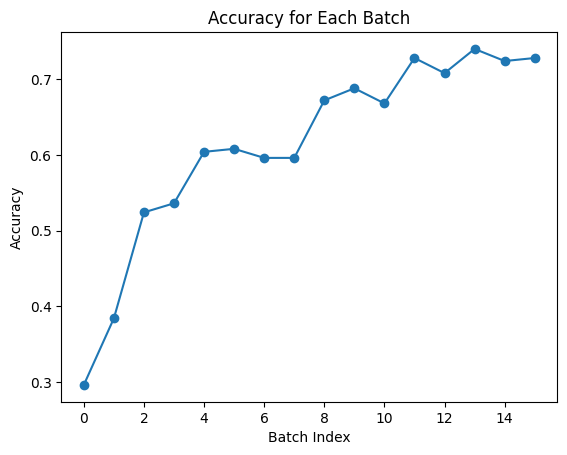

 Accuracy is: 0.7275641025641025
Test F1-Score: 0.7191751822321217 



<Figure size 3000x3000 with 0 Axes>

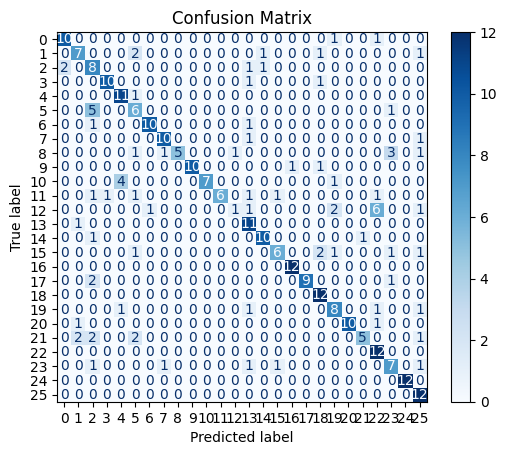

In [ ]:
# Initialize the model
model = SGDClassifier()
# Define batch size and calculate the number of batches
batch_size = 60
img_len = len(X_train)
val_len = len(X_val)
num_batch = img_len // batch_size
num_batch_val = val_len // batch_size

# Replay buffers
replay_buffer_X = []
replay_buffer_y = []

# List to store accuracy for each batch
acc = []
for batch_idx in range(num_batch):
    # Define the start and end indices for the current batch
    start = batch_idx * batch_size
    end = (batch_idx + 1) * batch_size
    start_val = batch_idx * batch_size
    end_val = (batch_idx + 1) * batch_size

    # Get the training batch data
    batch_data_X = X_train[start:end]
    batch_data_Y = Y_train[start:end]

    # Get the validation batch data
    batch_data_X_val = X_val[start_val:end_val]
    batch_data_Y_val = Y_val[start_val:end_val]

    # Append current batch data to replay buffer
    replay_buffer_X.append(batch_data_X)
    replay_buffer_y.append(batch_data_Y)

    # Concatenate current batch with replay buffer
    replay_X = np.concatenate(replay_buffer_X)
    replay_y = np.concatenate(replay_buffer_y)

    # Perform partial fit on the model
    if batch_idx == 0:
        output_model = model.partial_fit(replay_X, replay_y, classes=np.unique(Y_train))
    else:
        output_model = model.partial_fit(replay_X, replay_y)

    # Predict on the validation data
    prediction = model.predict(X_val)
    accuracy = accuracy_score(Y_val, prediction)
    acc.append(accuracy)
    print(f"Accuracy in batch {batch_idx}: {accuracy}")

# Plot accuracy for each batch
plt.plot(range(len(acc)), acc, marker='o')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Batch')
plt.show()

# Evaluate the final model on the test set
prediction_test = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediction_test)
print(f"Test Accuracy: {test_accuracy}")
for_plot.append(test_accuracy)
test_f1_score = f1_score(Y_test, prediction_test, average='weighted')
print(f"Test F1-Score: {test_f1_score}")

# Plot the confusion matrix
cm = confusion_matrix(Y_test, prediction_test)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In the next part, we consider `SVC`, a classification machine learning model. Instead of feeding all the training data at once, we utilize incremental learning, which allows the model to learn and update its knowledge instance-by-instance or batch-by-batch. For this scenario, we use batches of 60. After each batch is processed, the model updates its knowledge with the new data while retaining the patterns learned from previous batches, thus avoiding catastrophic forgetting. Finally, we plot the accuracy and the confusion matrix to evaluate the model's performance.

 Accuracy in 0 is: 0.272
 Accuracy in 1 is: 0.32
 Accuracy in 2 is: 0.28
 Accuracy in 3 is: 0.324
 Accuracy in 4 is: 0.252
 Accuracy in 5 is: 0.292
 Accuracy in 6 is: 0.252
 Accuracy in 7 is: 0.392
 Accuracy in 8 is: 0.388
 Accuracy in 9 is: 0.388
 Accuracy in 10 is: 0.34
 Accuracy in 11 is: 0.412
 Accuracy in 12 is: 0.304
 Accuracy in 13 is: 0.316
 Accuracy in 14 is: 0.42
 Accuracy in 15 is: 0.296
[0.272, 0.32, 0.28, 0.324, 0.252, 0.292, 0.252, 0.392, 0.388, 0.388, 0.34, 0.412, 0.304, 0.316, 0.42, 0.296]


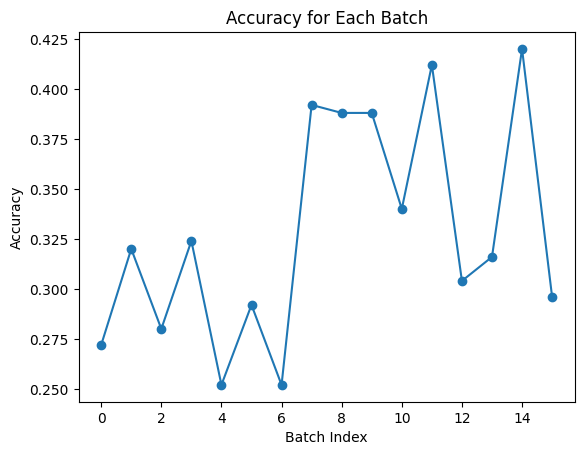

 Accuracy is: 0.2948717948717949
Test F1-Score: 0.23720855055677695 



<Figure size 3000x3000 with 0 Axes>

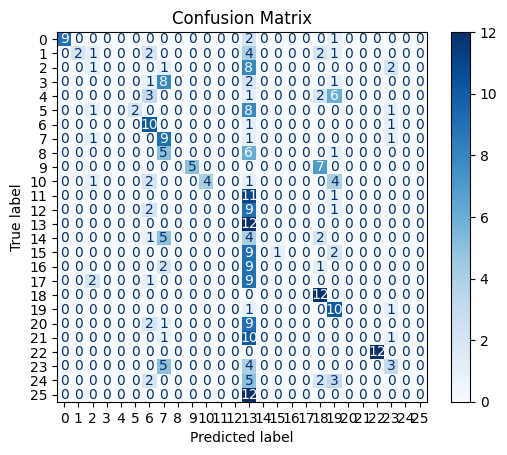

In [ ]:
model = SVC()
img_len = len(X_train)
val_len = len(X_val)
batch_size = 60
num_batch = img_len // batch_size
num_batch_val = val_len // batch_size
output_model = None  # Initialize the model
acc=[]
for batch_idx in range(num_batch):
    starting = batch_idx * batch_size
    ending = (batch_idx + 1) * batch_size
    starting_val = batch_idx * num_batch
    ending_val = (batch_idx + 1) * num_batch

    batch_data_X = X_train[starting:ending]
    batch_data_Y = Y_train[starting:ending]

    # On the first iteration, pass the classes argument
    output_model = model.fit(batch_data_X, batch_data_Y)

    prediction   = model.predict(X_val)
    accuracy=accuracy_score(Y_val, prediction)
    acc.append(accuracy)
    print(" Accuracy in " + str(batch_idx) + " is: "+ str(accuracy))
print(acc)
plt.plot(range(num_batch), acc, marker='o')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Batch')
plt.show()

prediction_test   = model.predict(X_test)
print(" Accuracy is: "+str(accuracy_score(Y_test, prediction_test)))
score_f1=f1_score(Y_test, prediction_test, average='weighted')
print(f"Test F1-Score: {score_f1} \n")
for_plot.append(score_f1)

cm=confusion_matrix(Y_test, prediction_test)
plt.figure(figsize=(30, 30))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Moving further, we consider `MLPClassifier`, a classification machine learning model. Instead of feeding all the training data at once, we utilize incremental learning, which allows the model to learn and update its knowledge instance-by-instance or batch-by-batch. For this scenario, we use batches of 60. After each batch is processed, the model updates its knowledge with the new data while retaining the patterns learned from previous batches, thus avoiding catastrophic forgetting. Finally, we plot the accuracy and the confusion matrix to evaluate the model's performance.

MLPClassifier()
 Accuracy in 0 is: 0.064
 Accuracy in 1 is: 0.1
 Accuracy in 2 is: 0.144
 Accuracy in 3 is: 0.2
 Accuracy in 4 is: 0.248
 Accuracy in 5 is: 0.316
 Accuracy in 6 is: 0.388
 Accuracy in 7 is: 0.436
 Accuracy in 8 is: 0.504
 Accuracy in 9 is: 0.56
 Accuracy in 10 is: 0.612
 Accuracy in 11 is: 0.64
 Accuracy in 12 is: 0.664
 Accuracy in 13 is: 0.692
 Accuracy in 14 is: 0.708
 Accuracy in 15 is: 0.736
[0.064, 0.1, 0.144, 0.2, 0.248, 0.316, 0.388, 0.436, 0.504, 0.56, 0.612, 0.64, 0.664, 0.692, 0.708, 0.736]


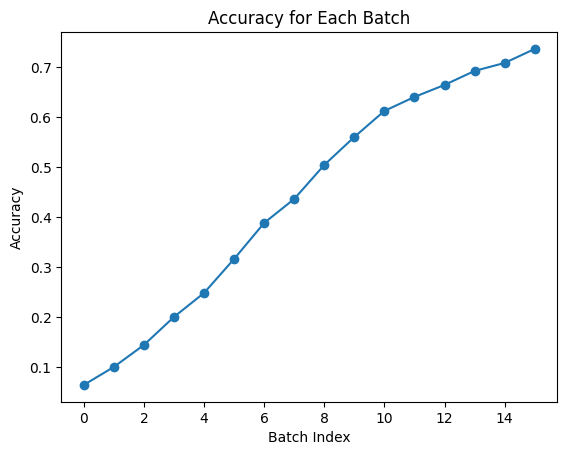

 Accuracy is: 0.7211538461538461
Test F1-Score: 0.7168258216973231 



<Figure size 3000x3000 with 0 Axes>

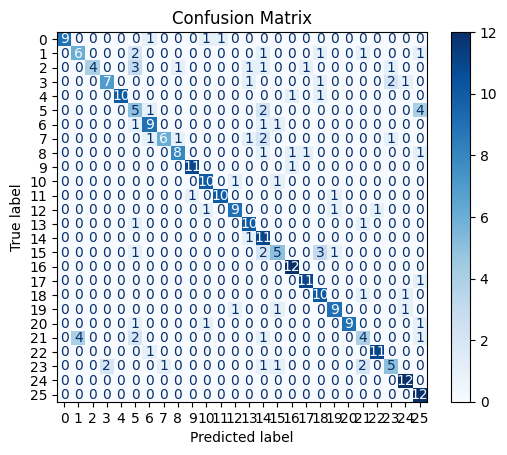

In [ ]:


# Initialize the model
model = MLPClassifier()

# Define batch size and calculate the number of batches
batch_size = 60
img_len = len(X_train)
val_len = len(X_val)
num_batch = img_len // batch_size
num_batch_val = val_len // batch_size

# Replay buffers
replay_buffer_X = []
replay_buffer_y = []

# List to store accuracy for each batch
acc = []

for batch_idx in range(num_batch):
    # Define the start and end indices for the current batch
    start = batch_idx * batch_size
    end = (batch_idx + 1) * batch_size
    start_val = batch_idx * batch_size
    end_val = (batch_idx + 1) * batch_size

    # Get the training batch data
    batch_data_X = X_train[start:end]
    batch_data_Y = Y_train[start:end]

    # Get the validation batch data
    batch_data_X_val = X_val[start_val:end_val]
    batch_data_Y_val = Y_val[start_val:end_val]

    # Append current batch data to replay buffer
    replay_buffer_X.append(batch_data_X)
    replay_buffer_y.append(batch_data_Y)

    # Concatenate current batch with replay buffer
    replay_X = np.concatenate(replay_buffer_X)
    replay_y = np.concatenate(replay_buffer_y)

    # Perform partial fit on the model
    if batch_idx == 0:
        output_model = model.partial_fit(replay_X, replay_y, classes=np.unique(Y_train))
    else:
        output_model = model.partial_fit(replay_X, replay_y)

    # Predict on the validation data
    prediction = model.predict(X_val)
    accuracy = accuracy_score(Y_val, prediction)
    acc.append(accuracy)
    print(f"Accuracy in batch {batch_idx}: {accuracy}")

# Plot accuracy for each batch
plt.plot(range(len(acc)), acc, marker='o')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Batch')
plt.show()

# Evaluate the final model on the test set
prediction_test = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediction_test)
print(f"Test Accuracy: {test_accuracy}")
for_plot.append(test_accuracy)
test_f1_score = f1_score(Y_test, prediction_test, average='weighted')
print(f"Test F1-Score: {test_f1_score}")

# Plot the confusion matrix
cm = confusion_matrix(Y_test, prediction_test)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Moving further, we consider `PassiveAggressiveClassifier`, a classification machine learning model. Instead of feeding all the training data at once, we utilize incremental learning, which allows the model to learn and update its knowledge instance-by-instance or batch-by-batch. For this scenario, we use batches of 60. After each batch is processed, the model updates its knowledge with the new data while retaining the patterns learned from previous batches, thus avoiding catastrophic forgetting. Finally, we plot the accuracy and the confusion matrix to evaluate the model's performance.

PassiveAggressiveClassifier(random_state=42)
 Accuracy in 0 is: 0.404
 Accuracy in 1 is: 0.58
 Accuracy in 2 is: 0.588
 Accuracy in 3 is: 0.588
 Accuracy in 4 is: 0.652
 Accuracy in 5 is: 0.688
 Accuracy in 6 is: 0.672
 Accuracy in 7 is: 0.736
 Accuracy in 8 is: 0.656
 Accuracy in 9 is: 0.744
 Accuracy in 10 is: 0.764
 Accuracy in 11 is: 0.728
 Accuracy in 12 is: 0.748
 Accuracy in 13 is: 0.768
 Accuracy in 14 is: 0.724
 Accuracy in 15 is: 0.784


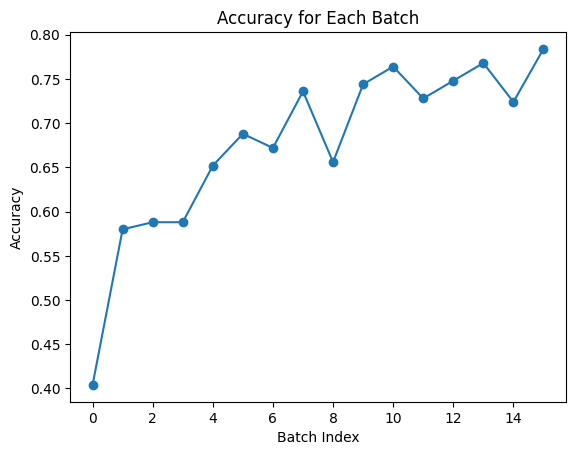

 Accuracy is: 0.7628205128205128
Test F1-Score: 0.7675875476027887 



<Figure size 3000x3000 with 0 Axes>

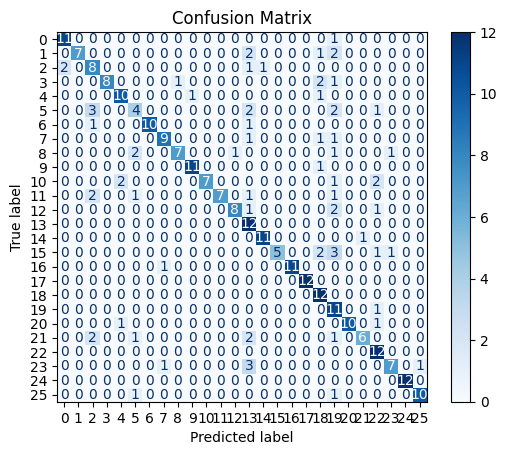

In [ ]:


# Initialize the model
model = PassiveAggressiveClassifier()

# Define batch size and calculate the number of batches
batch_size = 60
img_len = len(X_train)
val_len = len(X_val)
num_batch = img_len // batch_size
num_batch_val = val_len // batch_size

# Replay buffers
replay_buffer_X = []
replay_buffer_y = []

# List to store accuracy for each batch
acc = []

for batch_idx in range(num_batch):
    # Define the start and end indices for the current batch
    start = batch_idx * batch_size
    end = (batch_idx + 1) * batch_size
    start_val = batch_idx * batch_size
    end_val = (batch_idx + 1) * batch_size

    # Get the training batch data
    batch_data_X = X_train[start:end]
    batch_data_Y = Y_train[start:end]

    # Get the validation batch data
    batch_data_X_val = X_val[start_val:end_val]
    batch_data_Y_val = Y_val[start_val:end_val]

    # Append current batch data to replay buffer
    replay_buffer_X.append(batch_data_X)
    replay_buffer_y.append(batch_data_Y)

    # Concatenate current batch with replay buffer
    replay_X = np.concatenate(replay_buffer_X)
    replay_y = np.concatenate(replay_buffer_y)

    # Perform partial fit on the model
    if batch_idx == 0:
        output_model = model.partial_fit(replay_X, replay_y, classes=np.unique(Y_train))
    else:
        output_model = model.partial_fit(replay_X, replay_y)

    # Predict on the validation data
    prediction = model.predict(X_val)
    accuracy = accuracy_score(Y_val, prediction)
    acc.append(accuracy)
    print(f"Accuracy in batch {batch_idx}: {accuracy}")

# Plot accuracy for each batch
plt.plot(range(len(acc)), acc, marker='o')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Batch')
plt.show()

# Evaluate the final model on the test set
prediction_test = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, prediction_test)
print(f"Test Accuracy: {test_accuracy}")
for_plot.append(test_accuracy)
test_f1_score = f1_score(Y_test, prediction_test, average='weighted')
print(f"Test F1-Score: {test_f1_score}")

# Plot the confusion matrix
cm = confusion_matrix(Y_test, prediction_test)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


###FINAL ACCURACY VISUALISATION:

Finally we are going to visualise the plot of accuracy on the test set based on `f1_score`

In [ ]:
print(for_plot)

[0.7191751822321217, 0.23720855055677695, 0.7168258216973231, 0.7675875476027887]


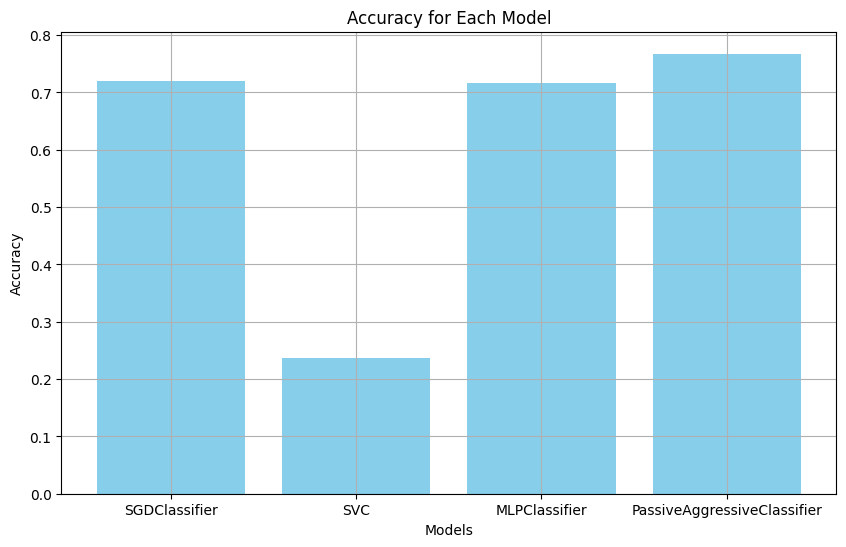

In [ ]:
names=['SGDClassifier', 'SVC', 'MLPClassifier', 'PassiveAggressiveClassifier']

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(names, for_plot, color='skyblue')

# Label the axes
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Model')

# Show the plot
plt.grid(True)
plt.show()